In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [145]:
# Load datasets
matches = pd.read_csv(r"C:\Users\sagar\OneDrive\Desktop\MRP\matches.csv")
deliveries = pd.read_csv(r"C:\Users\sagar\OneDrive\Desktop\MRP\deliveries.csv")

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [19]:
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [21]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [17]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [23]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [25]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [27]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [29]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [115]:
# dropping unnecessary  columns
matches.drop(columns=['super_over', 'method', 'umpire1', 'umpire2'], inplace=True)


In [117]:
#dropping column with a lot of null values
deliveries.drop(columns=['extras_type' , 'player_dismissed' , 'dismissal_kind', 'fielder'], inplace=True)

In [159]:
# season format mismatch
matches['season'] = pd.to_datetime(matches['date']).dt.year

In [33]:
matches['season'].head()


0    2008
1    2008
2    2008
3    2008
4    2008
Name: season, dtype: int32

In [37]:
matches['season'].unique()


array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024])

In [35]:
matches['season'].value_counts().sort_index()


season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021    60
2022    74
2023    74
2024    71
Name: count, dtype: int64

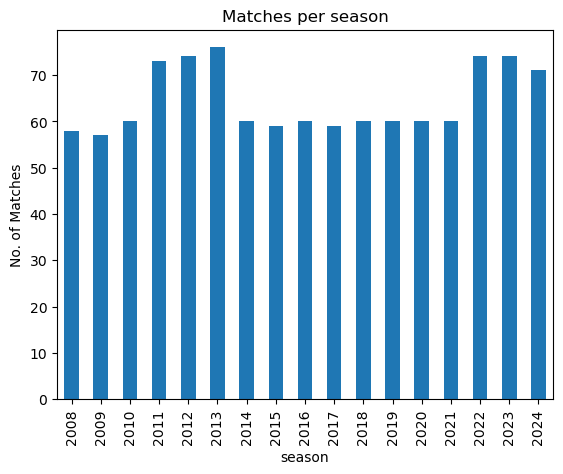

In [47]:
season_count = matches['season'].value_counts().sort_index()
season_count.plot(kind='bar', title='Matches per season')
plt.xlabel("season")
plt.ylabel("No. of Matches")
plt.show()

In [39]:
#Many teams have changed their names in various point of time..so to keep it uniform we will update the team names to the current ones.
matches["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [41]:
teams = [ 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Chennai Super Kings',
        'Sunrisers Hyderabad',
        'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru']

In [55]:
matches["team1"]=matches["team1"].str.replace("Delhi Daredevils","Delhi Capitals") 
matches["team2"]=matches["team2"].str.replace("Delhi Daredevils","Delhi Capitals")
matches["team1"]=matches["team1"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches["team2"]=matches["team2"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches["team1"]=matches["team1"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
matches["team2"]=matches["team2"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")

In [59]:
# Most winning teams
matches["winner"] = matches["winner"].str.replace("Delhi Daredevils", "Delhi Capitals")
matches["winner"] = matches["winner"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")
matches["winner"] = matches["winner"].str.replace("Royal Challengers Bangalore", "Royal Challengers Bengaluru")


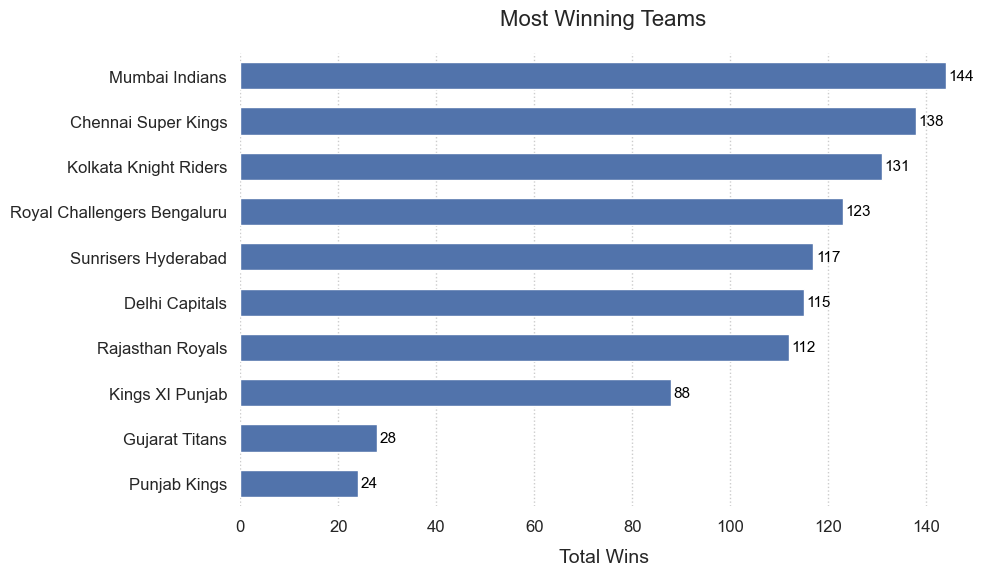

In [89]:
most_wins = matches['winner'].value_counts().head(10)
# Set plot style and context
sns.set_style("whitegrid", {'grid.linestyle': ':'})  # Subtle dotted grid
sns.set_context("notebook", font_scale=1.2)  # Slightly larger fonts

# Create plot with refined aesthetics
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=most_wins.values,
    y=most_wins.index,
    color="#4C72B0",  
    saturation=0.9,  # Reduce intensity slightly
    width=0.6       # Optimal bar thickness
)

# Enhance readability and aesthetics
plt.title("Most Winning Teams", fontsize=16, pad=20)
plt.xlabel("Total Wins", fontsize=14, labelpad=10)
plt.ylabel("")  # Remove redundant y-label
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove spines for cleaner look
sns.despine(left=True, bottom=True)

# Add value labels on bars
for i, v in enumerate(most_wins.values):
    ax.text(v + 0.5, i, str(v), 
            color='black', 
            fontsize=11, 
            va='center',
            fontweight='normal')

# Adjust layout and padding
plt.tight_layout()
plt.margins(x=0.03)  # Add small margin on right for value labels
plt.show()

In [73]:
# % of the matches where toss winner won the game
matches["toss_winner"] = matches["toss_winner"].str.replace("Delhi Daredevils", "Delhi Capitals")
matches["toss_winner"] = matches["toss_winner"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")
matches["toss_winner"] = matches["toss_winner"].str.replace("Royal Challengers Bangalore", "Royal Challengers Bengaluru")

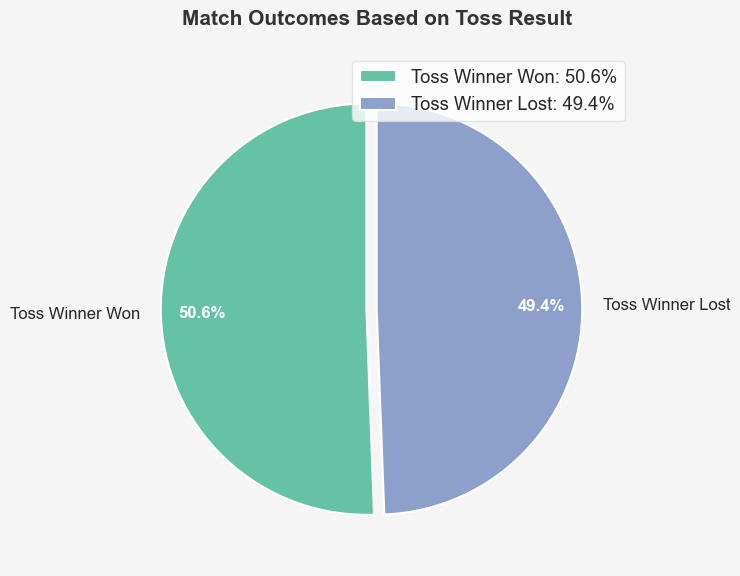

In [91]:
import matplotlib.pyplot as plt

# Create the toss_match_win column
matches['toss_match_win'] = matches['toss_winner'] == matches['winner']

# Calculate percentages
toss_win_percentage = matches['toss_match_win'].value_counts(normalize=True) * 100

# Define colors
colors = ['#66C2A5', '#8DA0CB']  # Muted teal and lavender
explode = (0.05, 0)  # Slightly emphasize the True segment

# Create pie chart
plt.figure(figsize=(8, 6), facecolor='#F5F5F5')  # Light background
wedges, texts, autotexts = plt.pie(
    toss_win_percentage,
    labels=['Toss Winner Won', 'Toss Winner Lost'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'fontfamily': 'sans-serif'},
    pctdistance=0.8,
    wedgeprops={'edgecolor': 'w', 'linewidth': 1.5}
)

# Enhance percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Add title and annotation
plt.title('Match Outcomes Based on Toss Result', 
          fontsize=15, pad=20, fontweight='bold', color='#333333')

# Add custom legend
plt.legend(wedges, 
           [f'{label}: {pct:.1f}%' 
            for label, pct in zip(['Toss Winner Won', 'Toss Winner Lost'], 
                                 toss_win_percentage)],
           loc='best',
           frameon=True,
           framealpha=0.8,
           edgecolor='#DDDDDD')

# Equal aspect ratio ensures pie is drawn as circle
plt.tight_layout()
plt.show()

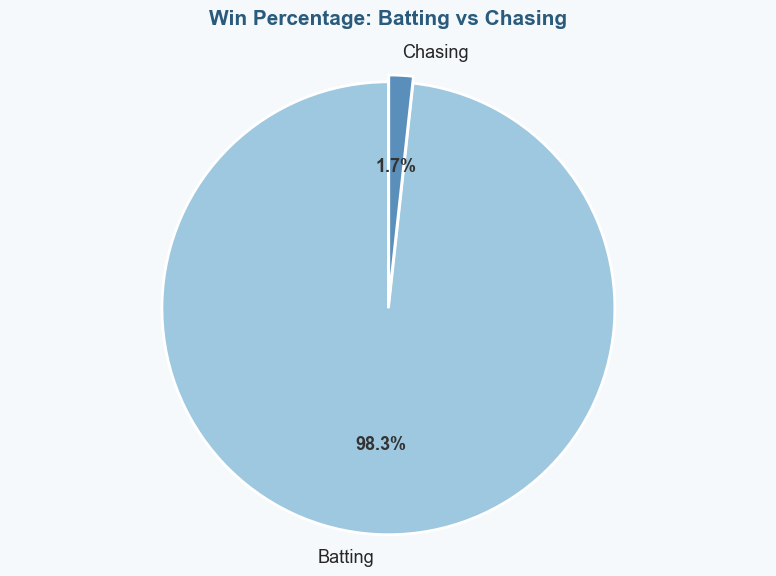

In [105]:
# win % : batting first vs chasing
# Create batting decision column
matches['win_type'] = matches.apply(
    lambda row: 'Batting' if row['result_margin'] > 0 else 'Chasing', axis=1)

# Calculate win percentages
win_percent = matches['win_type'].value_counts(normalize=True) * 100

# Set up custom blue shades
blue_colors = ['#9EC8E0', '#5A8FBB']  # Light powder blue & medium sapphire blue
explode = (0.03, 0)  # Slight emphasis on Bat First

# Create traditional pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    win_percent,
    labels=win_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=blue_colors,
    explode=explode,
    textprops={'fontsize': 13, 'fontweight': 'medium'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Add title with blue accent
plt.title('Win Percentage: Batting vs Chasing', 
          fontsize=15, pad=20, 
          fontweight='bold', color='#2A5A7C')

# Add percentage emphasis
for text in plt.gca().texts:
    if '%' in text.get_text():
        text.set_fontweight('bold')
        text.set_fontsize(13)
        text.set_color('#333333')

# Add subtle background
plt.gcf().set_facecolor('#F5F9FC')  # Very light blue tint

# Equal aspect ratio ensures pie is circular
plt.axis('equal')
plt.tight_layout()
plt.show()

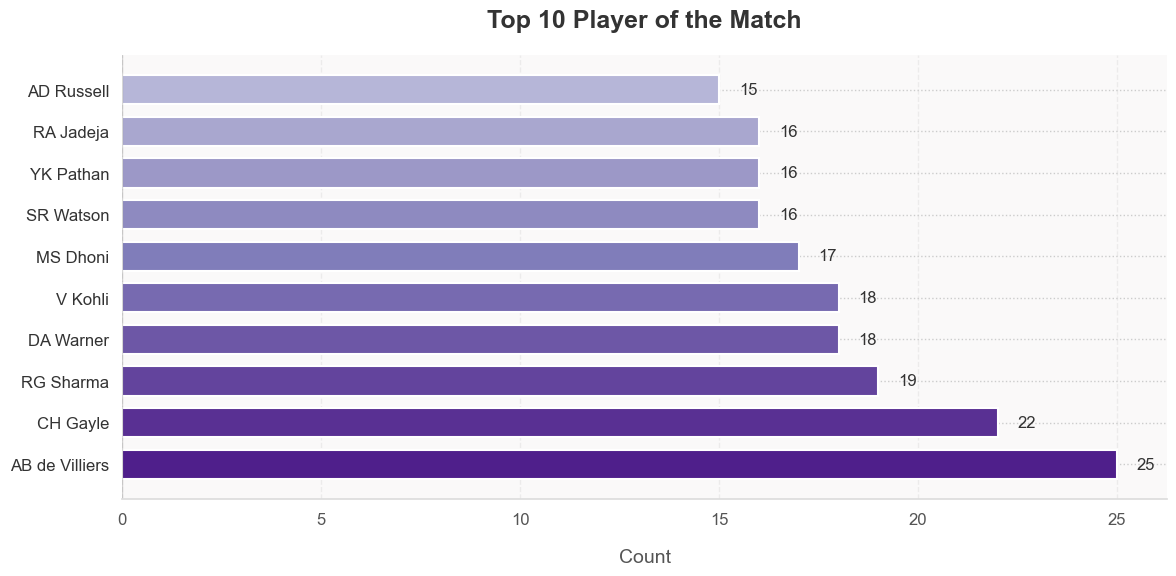

In [95]:
#Top 10 Player
top_players = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = plt.subplot()

# Create custom gradient (lavender to soft purple)
colors = plt.cm.Purples(np.linspace(0.4, 0.9, len(top_players))[::-1])

# Plot horizontal bars
ax.barh(top_players.index, top_players.values, color=colors, height=0.7, edgecolor='white', linewidth=1.5)

# Add value labels
for i, v in enumerate(top_players.values):
    ax.text(v + 0.5, i, str(v), 
            color='#333333', 
            fontsize=12, 
            va='center',
            fontweight='medium')

# Styling enhancements
plt.title('Top 10 Player of the Match', fontsize=18, pad=20, fontweight='bold', color='#333333')
plt.xlabel('Count', fontsize=14, labelpad=15, color='#555555')
plt.ylabel('')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#333333')

# Remove spines and add grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['left'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Add subtle background
ax.set_facecolor('#FAF9F9')
plt.gcf().set_facecolor('#FFFFFF')

# Add decorative elements
ax.axvline(0, color='#333333', alpha=0.2, linewidth=1)
plt.tight_layout()

plt.show()

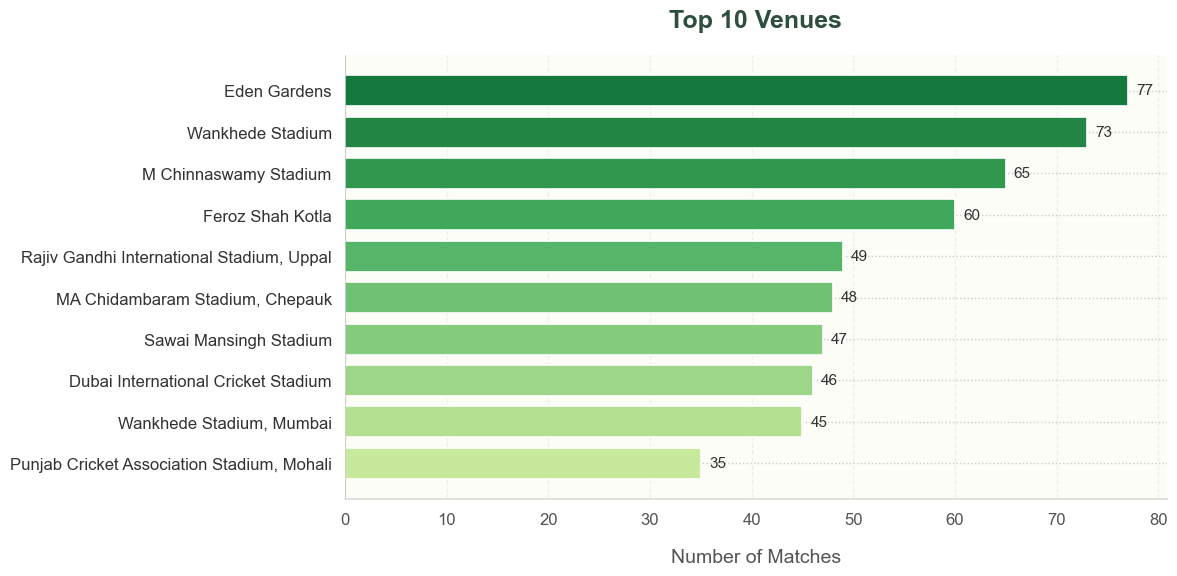

In [93]:
# Venues where the most number of matches took place 
venue_counts = matches['venue'].value_counts().head(10)
# Set up plot with refined aesthetics
plt.figure(figsize=(12, 6))
ax = plt.subplot()

#  custom earthy green gradient 
colors = plt.cm.YlGn(np.linspace(0.3, 0.8, len(venue_counts))[::-1])

# Plot horizontal bars
ax.barh(venue_counts.index, venue_counts.values, 
        color=colors, height=0.75, 
        edgecolor='white', linewidth=1.2)

# Add value labels
for i, v in enumerate(venue_counts.values):
    ax.text(v + 0.8, i, f"{v}", 
            color='#333333',
            fontsize=11,
            va='center',
            fontweight='medium')

# Styling enhancements
plt.title('Top 10 Venues', 
          fontsize=18, pad=20, 
          fontweight='bold', color='#2E4E3E')
plt.xlabel('Number of Matches', 
           fontsize=14, labelpad=15, 
           color='#555555')
plt.ylabel('')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#333333')

# Remove spines and add grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['left'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.25)

# Set backgrounds
ax.set_facecolor('#FCFDF7')  # Very light green tint
plt.gcf().set_facecolor('#FFFFFF')  # Pure white outer

# Add zero reference line
ax.axvline(0, color='#333333', alpha=0.2, linewidth=0.8)

# Ensure proper ordering (highest at top)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [149]:
#merging the two dataframes
merged_df = deliveries.merge(matches,how='left',left_on='match_id',right_on='id')

In [135]:
def all_players():
    unique_players = pd.concat([deliveries['batter'], deliveries['bowler']]).unique()
    return {"players": unique_players}


In [141]:
# Unique batters
batters = deliveries['batter'].unique()

# Unique bowlers
bowlers = deliveries['bowler'].unique()

# Preview the first few names
print("Batters:", batters[:10])
print("Bowlers:", bowlers[:10])


Batters: ['SC Ganguly' 'BB McCullum' 'RT Ponting' 'DJ Hussey' 'Mohammad Hafeez'
 'R Dravid' 'W Jaffer' 'V Kohli' 'JH Kallis' 'CL White']
Bowlers: ['P Kumar' 'Z Khan' 'AA Noffke' 'JH Kallis' 'SB Joshi' 'CL White'
 'AB Dinda' 'I Sharma' 'AB Agarkar' 'SC Ganguly']


In [153]:
#seasonal trends
merged_df["batting_team"] = merged_df["batting_team"].str.replace("Delhi Daredevils", "Delhi Capitals")
merged_df["batting_team"] = merged_df["batting_team"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")
merged_df["batting_team"] = merged_df["batting_team"].str.replace("Royal Challengers Bangalore", "Royal Challengers Bengaluru")
merged_df["bowling_team"] = merged_df["bowling_team"].str.replace("Delhi Daredevils", "Delhi Capitals")
merged_df["bowling_team"] = merged_df["bowling_team"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")
merged_df["bowling_team"] = merged_df["bowling_team"].str.replace("Royal Challengers Bangalore", "Royal Challengers Bengaluru")

In [163]:
merged_df['season'] = pd.to_datetime(merged_df['date']).dt.year.astype(int)


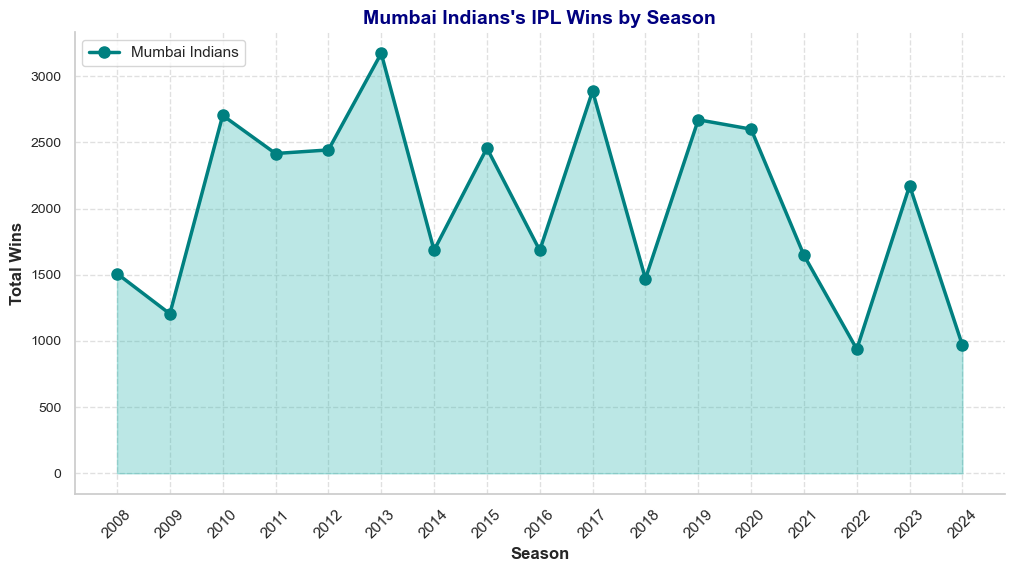

In [165]:

def team_growth(team_name, merged_df):
    """
    Plots the number of matches won by a given IPL team across seasons.
    
    Parameters:
        team_name (str): Name of the team (must match standardized names in 'winner' column).
        merged_df (DataFrame): Combined match and ball-by-ball dataset.
    """

    # Filter rows where the given team played
    team_matches = merged_df[(merged_df['batting_team'] == team_name) | 
                             (merged_df['bowling_team'] == team_name)].copy()

    # Filter only matches where this team won, then group by season
    wins_by_season = team_matches[team_matches['winner'] == team_name].groupby('season', as_index=False)['winner'].count()
    wins_by_season.rename(columns={'winner': 'total_wins'}, inplace=True)

    # Ensure seasons are sorted chronologically
    wins_by_season.sort_values('season', inplace=True)

    if wins_by_season.empty:
        print(f"⚠️ No data found for team: {team_name}")
        return

    # Plotting style
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Plot line and fill
    plt.plot(wins_by_season['season'], wins_by_season['total_wins'], 
             marker="o", color="teal", linewidth=2.5, 
             markersize=8, label=team_name)

    plt.fill_between(wins_by_season['season'], wins_by_season['total_wins'], 
                     color="lightseagreen", alpha=0.3)

    # Titles and labels
    plt.title(f"{team_name}'s IPL Wins by Season", fontsize=14, fontweight='bold', color="navy")
    plt.xlabel("Season", fontsize=12, fontweight='bold')
    plt.ylabel("Total Wins", fontsize=12, fontweight='bold')
    plt.xticks(wins_by_season['season'], rotation=45)
    plt.yticks(fontsize=10)
    plt.legend(loc="upper left", fontsize=11)
    plt.grid(True, linestyle="--", alpha=0.6)
    sns.despine()

    plt.show()

# Example Usage
team_growth("Mumbai Indians", merged_df)


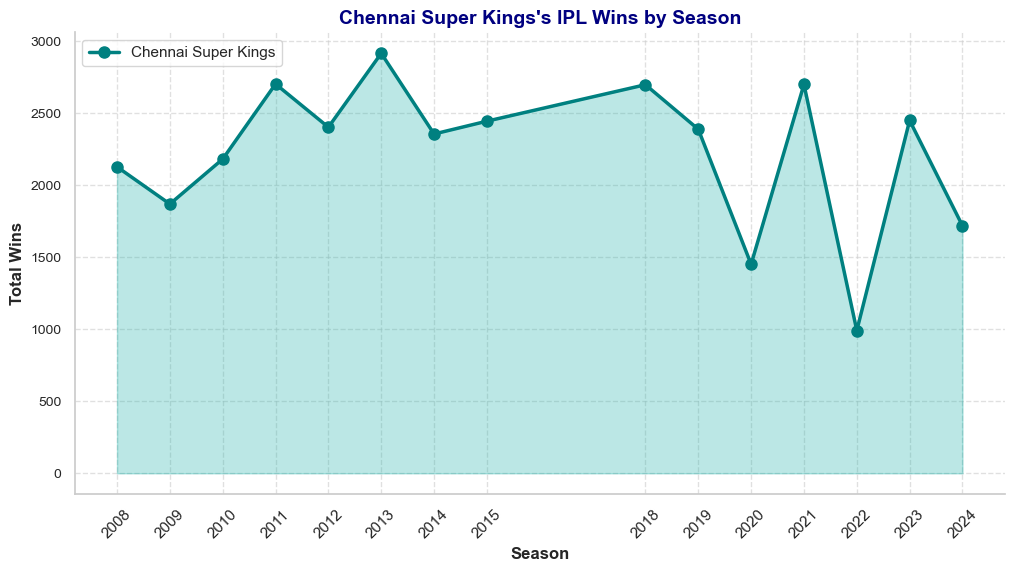

In [167]:

# Example Usage
team_growth("Chennai Super Kings", merged_df)

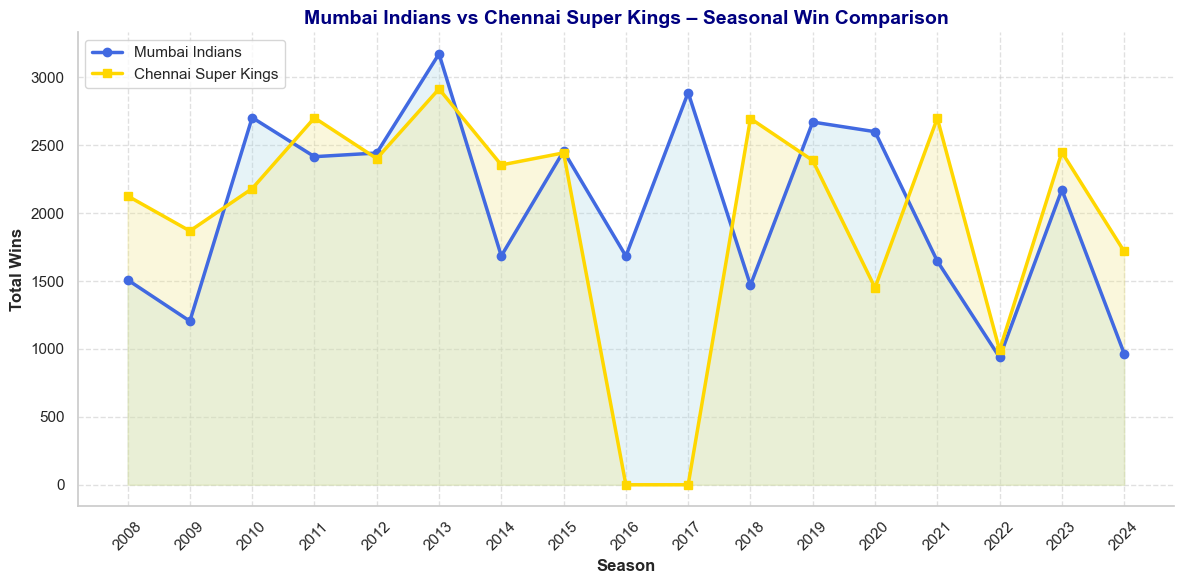

In [179]:

def compare_team_growth(team1, team2, merged_df):
    """
    Compare seasonal win trends between two IPL teams using the merged dataset.
    
    Parameters:
        team1 (str): First team name (must match standardized names).
        team2 (str): Second team name.
        merged_df (DataFrame): Merged deliveries + matches DataFrame.
    """

    # Filter matches where either team played
    df_filtered = merged_df[
        (merged_df['batting_team'].isin([team1, team2])) | 
        (merged_df['bowling_team'].isin([team1, team2]))
    ].copy()

    # Group by season and count wins for each team
    team1_wins = df_filtered[df_filtered['winner'] == team1].groupby('season')['winner'].count().reset_index(name=f'{team1}_wins')
    team2_wins = df_filtered[df_filtered['winner'] == team2].groupby('season')['winner'].count().reset_index(name=f'{team2}_wins')

    # Merge both win DataFrames on season
    df_merged = pd.merge(team1_wins, team2_wins, on='season', how='outer').fillna(0)
    df_merged = df_merged.sort_values('season')

    if df_merged.empty:
        print(f"⚠️ No data found for one or both teams: {team1}, {team2}")
        return

    # Plotting
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Team 1 line
    plt.plot(df_merged['season'], df_merged[f'{team1}_wins'], 
             marker='o', color='royalblue', linewidth=2.5, label=team1)
    plt.fill_between(df_merged['season'], df_merged[f'{team1}_wins'], color='lightblue', alpha=0.3)

    # Team 2 line
    plt.plot(df_merged['season'], df_merged[f'{team2}_wins'], 
             marker='s', color='gold', linewidth=2.5, label=team2)
    plt.fill_between(df_merged['season'], df_merged[f'{team2}_wins'], color='khaki', alpha=0.3)

    # Labels and formatting
    plt.title(f"{team1} vs {team2} – Seasonal Win Comparison", fontsize=14, fontweight='bold', color='navy')
    plt.xlabel("Season", fontsize=12, fontweight='bold')
    plt.ylabel("Total Wins", fontsize=12, fontweight='bold')
    plt.xticks(df_merged['season'], rotation=45)
    plt.legend(loc='upper left', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.6)
    sns.despine()

    plt.tight_layout()
    plt.show()
    
# Example Usage
compare_team_growth("Mumbai Indians", "Chennai Super Kings", merged_df)

In [181]:
def get_batsman_statistics(player_name, merged_df):
    """
    Returns detailed batting statistics for a given player from the merged IPL dataset.
    
    Parameters:
        player_name (str): Name of the batter (e.g., 'V Kohli')
        merged_df (DataFrame): Merged deliveries + matches dataset
    
    Returns:
        dict: Batting statistics summary
    """

    # Filter data for the selected batter
    player_data = merged_df[merged_df['batter'] == player_name]

    # Focus only on innings 1 and 2 (exclude Super Overs)
    innings_data = player_data[player_data['inning'].isin([1, 2])]

    # Total runs scored
    total_runs = innings_data['batsman_runs'].sum()

    # Valid balls faced (excluding wides)
    valid_balls = innings_data[innings_data['extras_type'] != 'wides'].shape[0]
    strike_rate = round((total_runs / valid_balls) * 100, 2) if valid_balls > 0 else 0

    # Boundaries
    total_fours = (innings_data['batsman_runs'] == 4).sum()
    total_sixes = (innings_data['batsman_runs'] == 6).sum()

    # Dismissals and batting average
    dismissals = innings_data[innings_data['is_wicket'] == 1].shape[0]
    batting_average = round(total_runs / dismissals, 2) if dismissals > 0 else np.nan

    # Player of the Match awards (from match-level data)
    player_awards = merged_df[(merged_df['player_of_match'] == player_name)][['match_id']].drop_duplicates().shape[0]

    # Match-wise run aggregation
    runs_per_match = innings_data.groupby('match_id')['batsman_runs'].sum()
    highest_score = runs_per_match.max() if not runs_per_match.empty else 0
    total_fifties = runs_per_match[(runs_per_match >= 50) & (runs_per_match < 100)].count()
    total_centuries = runs_per_match[runs_per_match >= 100].count()

    # Not out innings
    total_innings = innings_data['match_id'].nunique()
    not_outs = total_innings - dismissals

    return {
        "player_name": player_name,
        "total_innings": total_innings,
        "total_runs": total_runs,
        "total_fours": total_fours,
        "total_sixes": total_sixes,
        "batting_average": batting_average,
        "strike_rate": strike_rate,
        "total_fifties": total_fifties,
        "total_centuries": total_centuries,
        "highest_score": highest_score,
        "not_outs": not_outs,
        "player_of_the_match_awards": player_awards
    }

#example usage
get_batsman_statistics("V Kohli", merged_df)


{'player_name': 'V Kohli',
 'total_innings': 244,
 'total_runs': 8004,
 'total_fours': 706,
 'total_sixes': 273,
 'batting_average': 36.72,
 'strike_rate': 131.97,
 'total_fifties': 55,
 'total_centuries': 8,
 'highest_score': 113,
 'not_outs': 26,
 'player_of_the_match_awards': 18}

In [183]:
# Step 1: Aggregate total runs scored by each batter
batsman_totals = merged_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)

# Step 2: Get top 10 batters based on total runs
top_10_batsmen = batsman_totals.head(10).index.tolist()

# Step 3: Fetch detailed stats for each top batter
top_batsman_stats = [get_batsman_statistics(player, merged_df) for player in top_10_batsmen]

# Step 4: Convert to DataFrame and organize
top_batsman_df = pd.DataFrame(top_batsman_stats)
top_batsman_df = top_batsman_df.sort_values(by='total_runs', ascending=False)
top_batsman_df.set_index('player_name', inplace=True)

# Step 5: Display selected columns (customize as needed)
display_columns = ['total_runs', 'batting_average', 'strike_rate', 'total_fours', 'total_sixes']
styled_df = top_batsman_df[display_columns].style.background_gradient(cmap='YlGnBu').format(precision=2)

styled_df


,total_runs,batting_average,strike_rate,total_fours,total_sixes
player_name,,,,,
V Kohli,8004,36.72,131.97,706,273
S Dhawan,6769,34.89,127.14,768,153
RG Sharma,6628,28.57,131.14,599,281
DA Warner,6565,40.52,139.77,663,236
SK Raina,5528,33.10,136.73,506,203
MS Dhoni,5243,35.19,137.54,363,252
AB de Villiers,5162,41.30,151.69,413,251
CH Gayle,4965,39.09,148.96,405,357
RV Uthappa,4952,26.91,130.35,481,182


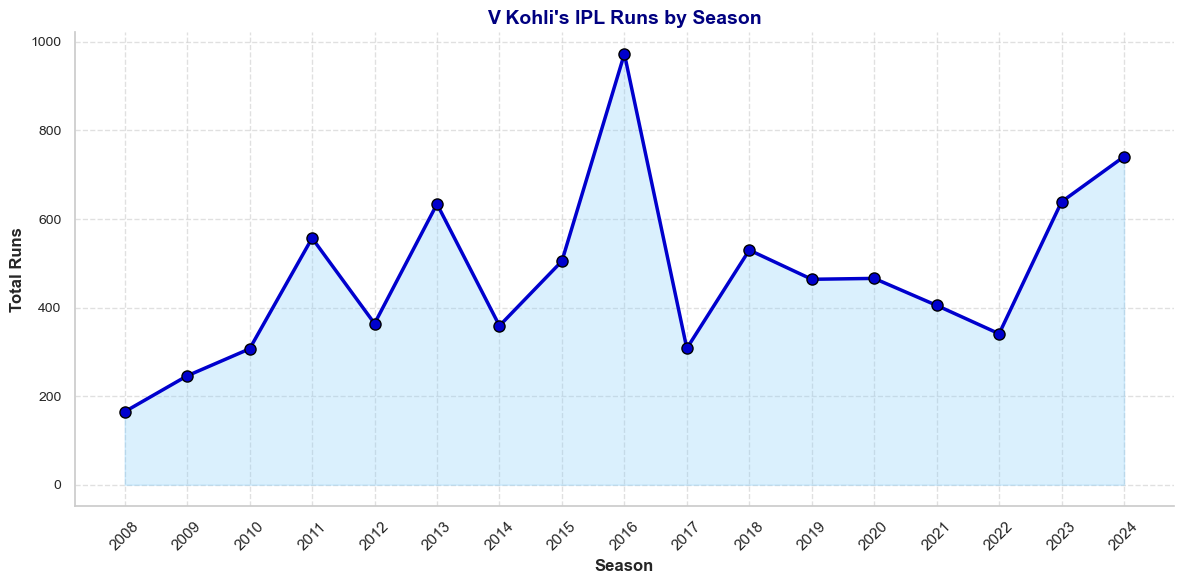

In [193]:
#seasonal progression of a batsman

def batsman_growth(batsman_name, merged_df):
    """
    Plots the seasonal run progression of a given IPL batsman.
    
    Parameters:
        batsman_name (str): Name of the batter (e.g., 'V Kohli')
        merged_df (DataFrame): Merged deliveries + matches dataset
    """

    # Filter for innings 1 and 2 only (exclude Super Overs)
    df_filtered = merged_df[
        (merged_df['batter'] == batsman_name) & 
        (merged_df['inning'].isin([1, 2]))
    ].copy()

    # Group by season and sum total runs
    season_runs = df_filtered.groupby('season', as_index=False)['batsman_runs'].sum()

    if season_runs.empty:
        print(f"⚠️ No data found for {batsman_name}")
        return

    # Plotting
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Line plot with area fill
    plt.plot(season_runs['season'], season_runs['batsman_runs'],
             marker='o', color='mediumblue', linewidth=2.5,
             markersize=8, markeredgecolor='black', markerfacecolor='mediumblue')
    plt.fill_between(season_runs['season'], season_runs['batsman_runs'], color='lightskyblue', alpha=0.3)

    # Labels and title
    plt.title(f"{batsman_name}'s IPL Runs by Season", fontsize=14, fontweight='bold', color='navy')
    plt.xlabel("Season", fontsize=12, fontweight='bold')
    plt.ylabel("Total Runs", fontsize=12, fontweight='bold')
    plt.xticks(season_runs['season'], rotation=45)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    sns.despine()

    plt.tight_layout()
    plt.show()

#example usange
batsman_growth("V Kohli", merged_df)



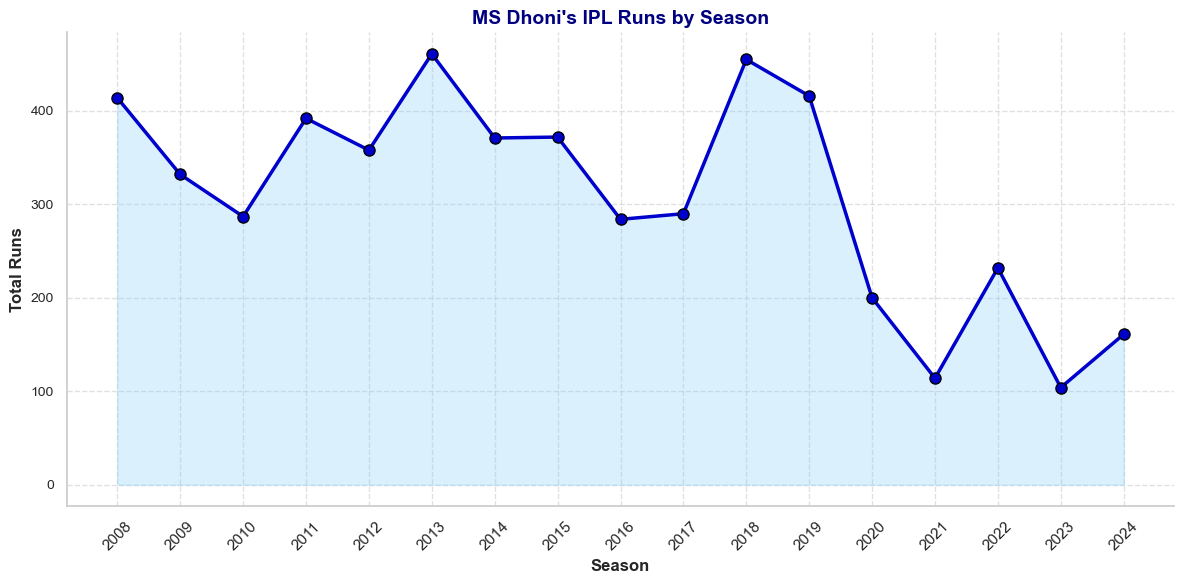

In [195]:
#example usange
batsman_growth("MS Dhoni", merged_df)


C:\Users\sagar\AppData\Local\Temp\ipykernel_25884\528303871.py:86: UserWarning: Glyph 10033 (\N{HEAVY ASTERISK}) missing from current font.
  plt.tight_layout()
C:\Users\sagar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10033 (\N{HEAVY ASTERISK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


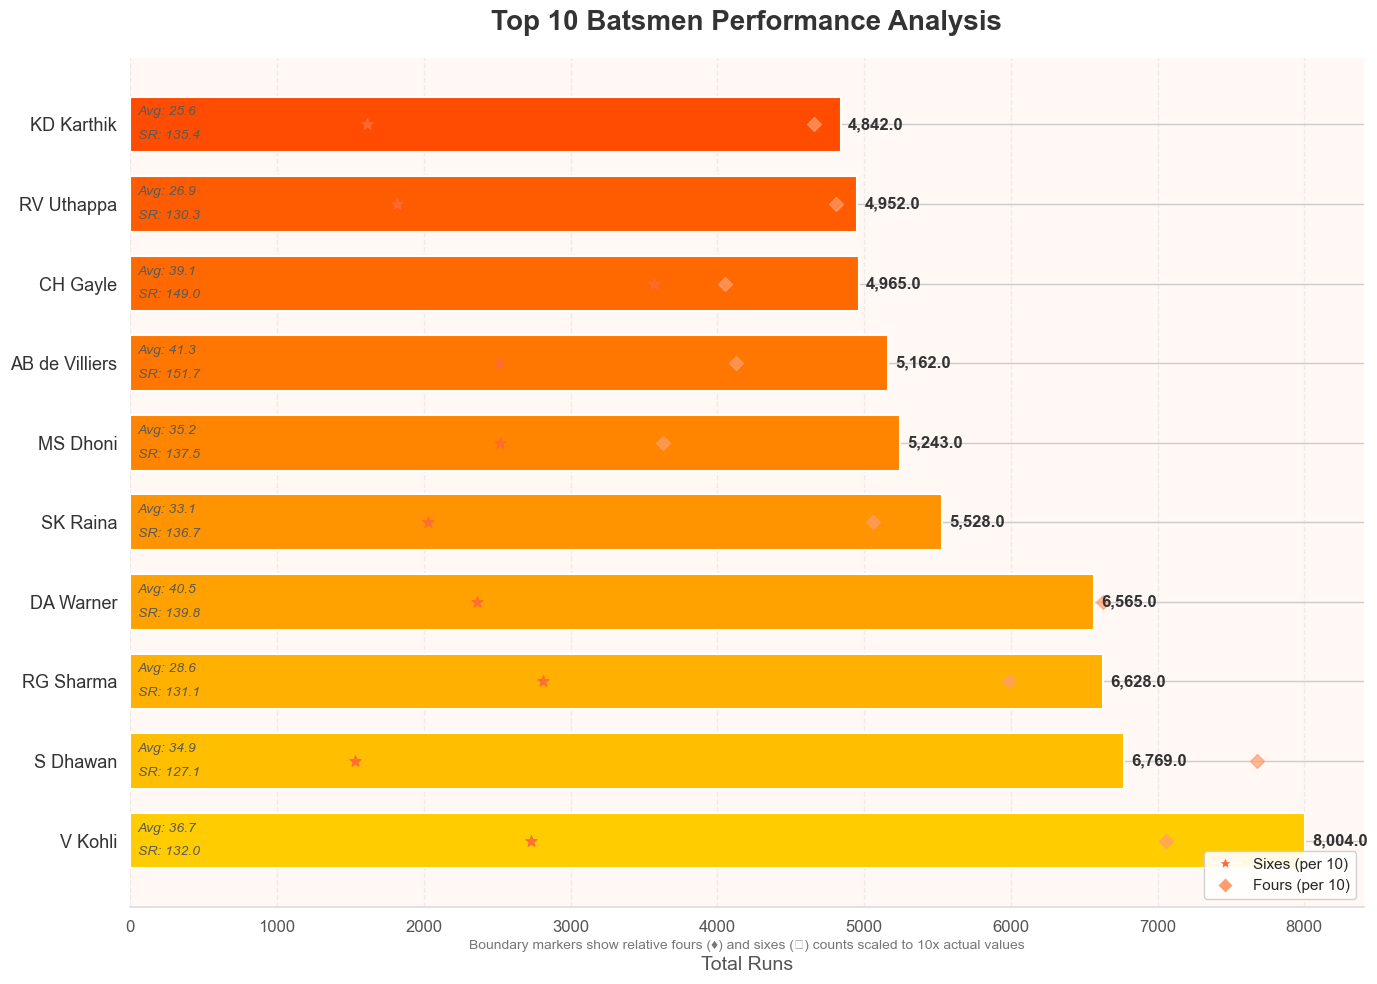

In [189]:
# Create a horizontal bar chart with custom styling
plt.figure(figsize=(14, 10))
ax = plt.subplot()

# a custom coral-orange gradient
colors = plt.cm.autumn(np.linspace(0.3, 0.8, len(top_batsman_df)))[::-1]

# Plot horizontal bars for total runs
bars = ax.barh(top_batsman_df.index, 
               top_batsman_df['total_runs'], 
               color=colors, 
               edgecolor='white',
               linewidth=1.5,
               height=0.7)

# Add value labels
for i, (name, row) in enumerate(top_batsman_df.iterrows()):
    # Main run count
    ax.text(row['total_runs'] + 50, i, 
            f"{row['total_runs']:,}", 
            va='center', 
            fontsize=12,
            fontweight='bold',
            color='#333333')
    
    # Secondary metrics
    ax.text(50, i-0.15, 
            f"SR: {row['strike_rate']:.1f}", 
            va='center', 
            fontsize=10,
            color='#5A5A5A',
            fontstyle='italic')
    
    ax.text(50, i+0.15, 
            f"Avg: {row['batting_average']:.1f}", 
            va='center', 
            fontsize=10,
            color='#5A5A5A',
            fontstyle='italic')

# Add boundary markers
for i, (name, row) in enumerate(top_batsman_df.iterrows()):
    # Four markers
    ax.scatter([row['total_fours']*10], [i], 
               s=50, color='#FF9E6D', alpha=0.7, marker='D', label='Fours' if i==0 else "")
    # Six markers
    ax.scatter([row['total_sixes']*10], [i], 
               s=70, color='#FF6B35', alpha=0.9, marker='*', label='Sixes' if i==0 else "")

# Styling and labeling
plt.title('Top 10 Batsmen Performance Analysis', 
          fontsize=20, pad=20, 
          fontweight='bold', color='#333333')
plt.xlabel('Total Runs', fontsize=14, labelpad=15, color='#555555')
plt.ylabel('')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=13, color='#333333')

# Add grid and remove spines
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Add legends
six_legend = plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='#FF6B35', markersize=10, label='Sixes (per 10)')
four_legend = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#FF9E6D', markersize=8, label='Fours (per 10)')
ax.legend(handles=[six_legend, four_legend], 
          loc='lower right', 
          frameon=True,
          framealpha=0.9)

# Add background color
ax.set_facecolor('#FFF8F5')
plt.gcf().set_facecolor('#FFFFFF')

# Add data source note
plt.annotate("Boundary markers show relative fours (♦) and sixes (✱) counts scaled to 10x actual values", 
             xy=(0.5, -0.05), 
             xycoords='axes fraction', 
             ha='center', 
             fontsize=10, 
             color='#777777')

plt.tight_layout()
plt.show()